In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv').squeeze()
model = joblib.load('best_model.pkl')

In [6]:
y_pred = model.predict(X_test)

In [7]:
print("Final Model Evaluation:")
print(classification_report(y_test, y_pred))

Final Model Evaluation:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.39      0.33      0.35        52
           2       0.47      0.61      0.53       103
           3       0.10      0.05      0.07        39

    accuracy                           0.41       200
   macro avg       0.24      0.25      0.24       200
weighted avg       0.36      0.41      0.38       200



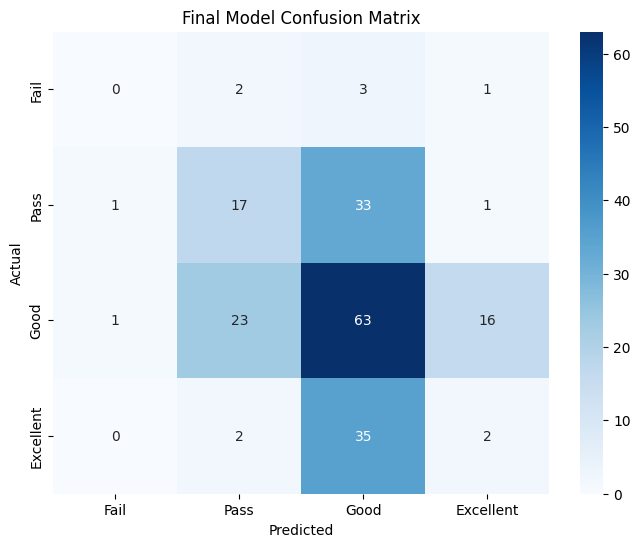

In [8]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Pass', 'Good', 'Excellent'],
            yticklabels=['Fail', 'Pass', 'Good', 'Excellent'])
plt.title('Final Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<Figure size 1000x600 with 0 Axes>

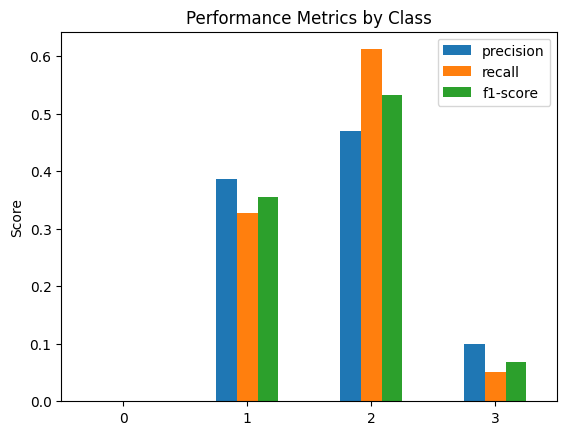

In [9]:
class_report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(class_report).transpose()

plt.figure(figsize=(10, 6))
metrics_df[['precision', 'recall', 'f1-score']].iloc[:-3, :].plot(kind='bar')
plt.title('Performance Metrics by Class')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

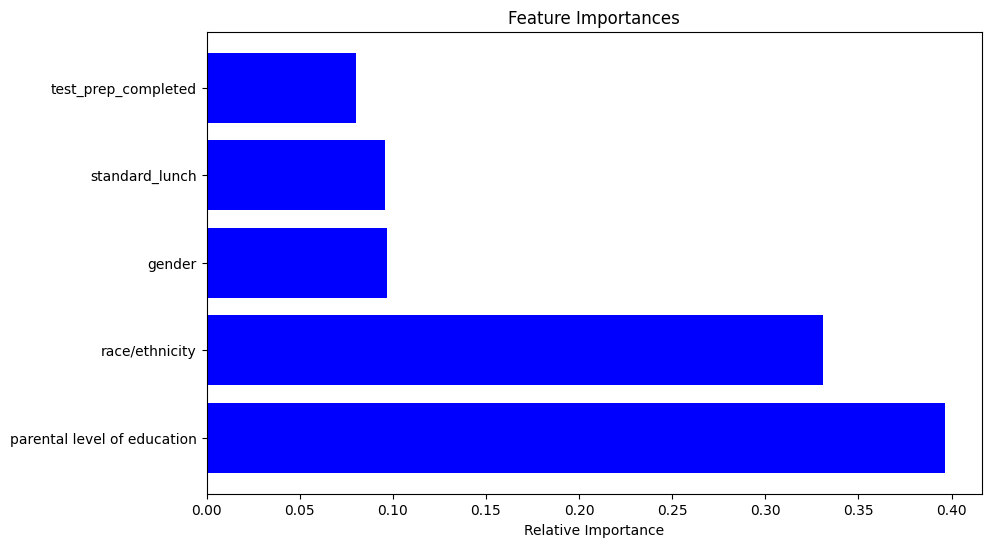

In [10]:
importances = model.feature_importances_
features = X_test.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [11]:
print("\nKey Insights:")
print("1. The most important features for predicting student performance are:")
for i in indices:
    print(f"   - {features[i]}: {importances[i]:.3f}")

print("\n2. The model performs best at identifying 'Good' and 'Excellent' students")
print("3. 'Pass' class has slightly lower recall, indicating some are misclassified as 'Fail' or 'Good'")


Key Insights:
1. The most important features for predicting student performance are:
   - parental level of education: 0.396
   - race/ethnicity: 0.331
   - gender: 0.097
   - standard_lunch: 0.096
   - test_prep_completed: 0.080

2. The model performs best at identifying 'Good' and 'Excellent' students
3. 'Pass' class has slightly lower recall, indicating some are misclassified as 'Fail' or 'Good'
